# Problem Statement

Importing important libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import accuracy_score , confusion_matrix

In [2]:
df = pd.read_csv("healthcare_finance.csv")
df

,Unnamed: 0,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,0,BFAFX,American Funds Bond Fund of Amer F1,-0.05,-0.45%,11.01,11.17,11.14,-0.84%,-0.84%,NaN
1,1,ABNFX,American Funds Bond Fund of Amer F2,-0.05,-0.45%,11.01,11.17,11.14,-0.76%,-0.76%,NaN
2,2,CFAEX,American Funds Bond Fund of Amer 529E,-0.05,-0.45%,11.01,11.17,11.14,-0.88%,-0.88%,NaN
3,3,CFAFX,American Funds Bond Fund of Amer 529F,-0.05,-0.45%,11.01,11.17,11.14,-0.79%,-0.79%,NaN
4,4,RBFEX,American Funds Bond Fund of Amer R4,-0.05,-0.45%,11.01,11.17,11.14,-0.82%,-0.82%,NaN
...,...,...,...,...,...,...,...,...,...,...,...
445,445,0P0001M384,Polar Capital Fut Healthcare A acc USD,0.83,+0.85%,96.93,100.68,93.09,9.32%,9.32%,NaN
446,446,0P0001LUQZ,Invesco Funds - Invesco China Health Care Equi...,-0.01,-0.23%,4.2800,4.22,4.52,-11.42%,-11.42%,NaN
447,447,0P00000BON,Candriam Equities L Biotechnology,5.16,+0.71%,728.37,765.35,718.69,2.78%,2.78%,NaN
448,448,0P0001HJ7Z,Bellevue (Lux) Bellevue Dgtl Hthl AI2USD,1.53,+1.18%,129.78,135.55,133.36,1.49%,1.49%,NaN


# Checking null values

In [3]:
df.isnull().mean()*100>0

Unnamed: 0           False
Symbol               False
Name                 False
Price (Intraday)     False
Change               False
% Change             False
Volume               False
Avg Vol (3 month)    False
Market Cap            True
PE Ratio (TTM)        True
52 Week Range         True
dtype: bool

In [4]:
df.isna().sum()

Unnamed: 0             0
Symbol                 0
Name                   0
Price (Intraday)       0
Change                 0
% Change               0
Volume                 0
Avg Vol (3 month)      0
Market Cap             5
PE Ratio (TTM)         5
52 Week Range        450
dtype: int64

In [5]:
df.drop(columns=['52 Week Range'], inplace=True)
df.drop(columns=["Unnamed: 0"], inplace=True)
df.drop(columns=["Symbol"], inplace=True)
df.drop(columns=["PE Ratio (TTM)"], inplace=True)

In [6]:
df

,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap
0,American Funds Bond Fund of Amer F1,-0.05,-0.45%,11.01,11.17,11.14,-0.84%
1,American Funds Bond Fund of Amer F2,-0.05,-0.45%,11.01,11.17,11.14,-0.76%
2,American Funds Bond Fund of Amer 529E,-0.05,-0.45%,11.01,11.17,11.14,-0.88%
3,American Funds Bond Fund of Amer 529F,-0.05,-0.45%,11.01,11.17,11.14,-0.79%
4,American Funds Bond Fund of Amer R4,-0.05,-0.45%,11.01,11.17,11.14,-0.82%
...,...,...,...,...,...,...,...
445,Polar Capital Fut Healthcare A acc USD,0.83,+0.85%,96.93,100.68,93.09,9.32%
446,Invesco Funds - Invesco China Health Care Equi...,-0.01,-0.23%,4.2800,4.22,4.52,-11.42%
447,Candriam Equities L Biotechnology,5.16,+0.71%,728.37,765.35,718.69,2.78%
448,Bellevue (Lux) Bellevue Dgtl Hthl AI2USD,1.53,+1.18%,129.78,135.55,133.36,1.49%


# Encoding

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the column you want to scale
column_to_scale = ['Price (Intraday)']

# Remove commas from the column
df[column_to_scale] = df[column_to_scale].replace({',': ''}, regex=True)

# Convert the column to float
df[column_to_scale] = df[column_to_scale].astype(float)

# Apply the scaler to the selected column
df[column_to_scale] = scaler.fit_transform(df[column_to_scale])

# Display the updated DataFrame
print(df)


                                                  Name  Price (Intraday)  \
0                  American Funds Bond Fund of Amer F1          0.300878   
1                  American Funds Bond Fund of Amer F2          0.300878   
2                American Funds Bond Fund of Amer 529E          0.300878   
3                American Funds Bond Fund of Amer 529F          0.300878   
4                  American Funds Bond Fund of Amer R4          0.300878   
..                                                 ...               ...   
445             Polar Capital Fut Healthcare A acc USD          0.309278   
446  Invesco Funds - Invesco China Health Care Equi...          0.301260   
447                  Candriam Equities L Biotechnology          0.350611   
448           Bellevue (Lux) Bellevue Dgtl Hthl AI2USD          0.315960   
449                      Sector Healthcare Value B USD          0.315388   

     Change % Change  Volume Avg Vol (3 month) Market Cap  
0    -0.45%    11.01   11.1

In [8]:
def frequency_encoding(colName):
        enc_Name = (df.groupby(colName).size())/len(df)
        df['Name_encode']= df[colName].apply(lambda x : enc_Name[x])

In [9]:
frequency_encoding("Name")

In [10]:
# Print unique values in 'Market Cap' before conversion
print("Unique values in 'Market Cap' before conversion:")
print(df['Market Cap'].unique())

# Perform the conversion operations, handling percentage signs
df['Market Cap'] = df['Market Cap'].str.rstrip('%').astype(str).str.replace(',', '').str.rstrip('BM').astype(float) * 1e6

# Check unique values in 'Market Cap' after conversion
print("Unique values in 'Market Cap' after conversion:")
print(df['Market Cap'].unique())


Unique values in 'Market Cap' before conversion:
['-0.84%' '-0.76%' '-0.88%' '-0.79%' '-0.82%' '-0.75%' '-0.74%' '-1.02%'
 '-1.00%' '-0.93%' '-0.89%' '-0.83%' '-1.01%' '-0.77%' '5.07%' '5.08%'
 '8.32%' '7.95%' '7.98%' '8.75%' '8.65%' '8.57%' '8.46%' '8.69%' '8.78%'
 '6.82%' '-0.57%' '-0.32%' '-0.34%' '-0.28%' '-0.54%' '-0.25%' '-0.30%'
 '-0.22%' '9.05%' '8.47%' '8.53%' '8.56%' '8.52%' '6.71%' '6.52%' '6.65%'
 '6.58%' '6.39%' '10.54%' '8.60%' '0.75%' '0.76%' '0.62%' '0.85%' '0.88%'
 '0.81%' '-0.15%' '-0.23%' '0.04%' '-0.04%' '0.02%' '-0.11%' '1.28%'
 '1.51%' '1.46%' '1.50%' '1.47%' '1.40%' '1.53%' '8.20%' '8.30%' '-0.36%'
 '-0.47%' '-0.48%' '0.23%' '0.12%' '0.25%' '0.18%' '0.13%' '0.22%' '0.17%'
 '0.01%' '-0.08%' '0.06%' '0.07%' '-0.09%' '0.20%' '13.08%' '12.97%'
 '12.80%' '13.15%' '13.10%' '13.17%' '12.93%' '1.32%' '8.62%' '8.36%'
 '1.19%' '1.08%' '1.14%' '1.29%' '1.20%' '1.13%' '1.04%' '4.67%' '4.65%'
 '4.47%' '4.76%' nan '13.16%' '13.27%' '13.26%' '3.13%' '10.35%' '10.38%'
 '10.16%' 

In [11]:
df.drop(columns=['Name'], inplace=True)

In [12]:
# Remove ',' and 'M' from 'Volume' column and convert to float
df['Volume'] = df['Volume'].astype(str).str.replace(',', '').str.rstrip('M').astype(float) * 1e6

In [13]:
# Remove ',' from 'Avg Vol (3 month)' column and convert to float
df['Avg Vol (3 month)'] = df['Avg Vol (3 month)'].astype(str).str.replace(',', '').str.rstrip('M').astype(float) * 1e6

In [14]:
df

,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,Name_encode
0,0.300878,-0.45%,11.01,11170000.0,11140000.0,-840000.0,0.002222
1,0.300878,-0.45%,11.01,11170000.0,11140000.0,-760000.0,0.002222
2,0.300878,-0.45%,11.01,11170000.0,11140000.0,-880000.0,0.002222
3,0.300878,-0.45%,11.01,11170000.0,11140000.0,-790000.0,0.002222
4,0.300878,-0.45%,11.01,11170000.0,11140000.0,-820000.0,0.002222
...,...,...,...,...,...,...,...
445,0.309278,+0.85%,96.93,100680000.0,93090000.0,9320000.0,0.002222
446,0.301260,-0.23%,4.2800,4220000.0,4520000.0,-11420000.0,0.002222
447,0.350611,+0.71%,728.37,765350000.0,718690000.0,2780000.0,0.004444
448,0.315960,+1.18%,129.78,135550000.0,133360000.0,1490000.0,0.002222


# Scaling

In [15]:
df.drop(columns=['Change'], inplace=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select only the numerical columns you want to scale
numerical_columns = ['Price (Intraday)', '% Change', 'Volume', 'Avg Vol (3 month)', 'Market Cap']

# Remove commas from all numerical columns
df[numerical_columns] = df[numerical_columns].replace({',': ''}, regex=True)

# Convert all numerical columns to float
df[numerical_columns] = df[numerical_columns].astype(float)

# Apply the scaler to the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the updated DataFrame
print(df)


     Price (Intraday)  % Change    Volume  Avg Vol (3 month)  Market Cap  \
0            0.300878  0.001304  0.001315           0.001196    0.427006   
1            0.300878  0.001304  0.001315           0.001196    0.429375   
2            0.300878  0.001304  0.001315           0.001196    0.425822   
3            0.300878  0.001304  0.001315           0.001196    0.428487   
4            0.300878  0.001304  0.001315           0.001196    0.427598   
..                ...       ...       ...                ...         ...   
445          0.309278  0.012323  0.012728           0.010718    0.727865   
446          0.301260  0.000441  0.000428           0.000426    0.113710   
447          0.350611  0.093304  0.097477           0.083409    0.534202   
448          0.315960  0.016536  0.017174           0.015397    0.496002   
449          0.315388  0.020718  0.021287           0.019093    0.548712   

     Name_encode  
0       0.002222  
1       0.002222  
2       0.002222  
3       0.0

In [17]:
df

,Price (Intraday),% Change,Volume,Avg Vol (3 month),Market Cap,Name_encode
0,0.300878,0.001304,0.001315,0.001196,0.427006,0.002222
1,0.300878,0.001304,0.001315,0.001196,0.429375,0.002222
2,0.300878,0.001304,0.001315,0.001196,0.425822,0.002222
3,0.300878,0.001304,0.001315,0.001196,0.428487,0.002222
4,0.300878,0.001304,0.001315,0.001196,0.427598,0.002222
...,...,...,...,...,...,...
445,0.309278,0.012323,0.012728,0.010718,0.727865,0.002222
446,0.301260,0.000441,0.000428,0.000426,0.113710,0.002222
447,0.350611,0.093304,0.097477,0.083409,0.534202,0.004444
448,0.315960,0.016536,0.017174,0.015397,0.496002,0.002222


# Clustering

C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

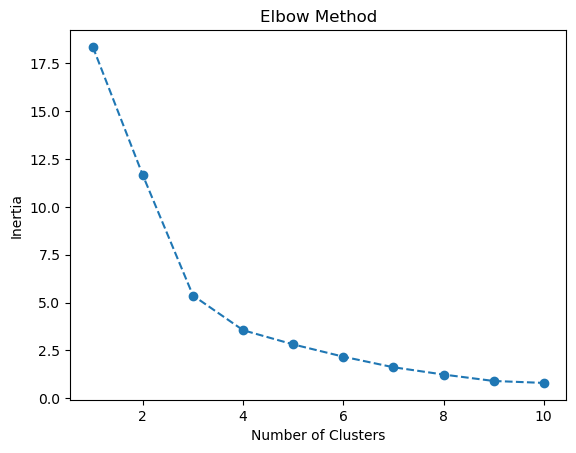

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the relevant columns for clustering
cols_to_cluster = ['Price (Intraday)', 'Volume', 'Avg Vol (3 month)', 'Market Cap']
data_for_clustering = df[cols_to_cluster]

# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_for_clustering_imputed = imputer.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_for_clustering_imputed)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster Centers:
   Price (Intraday)    Volume  Avg Vol (3 month)  Market Cap
0          0.307318  0.021013           0.018255     0.57772


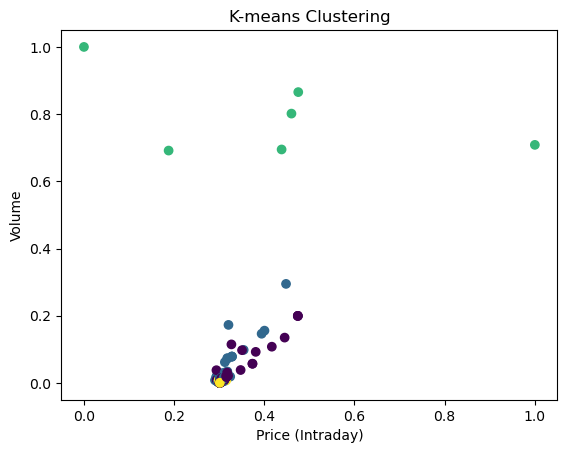

In [19]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_for_clustering_imputed)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Display the cluster centers
cluster_centers = pd.DataFrame(
    imputer.statistics_.reshape(1, -1),  # Using imputer.statistics_ instead of inverse_transform
    columns=cols_to_cluster
)
print("Cluster Centers:")
print(cluster_centers)

# Visualize the clusters (for 2D data)
# Assuming you want to visualize the 'Price' and 'Volume' columns
plt.scatter(df['Price (Intraday)'], df['Volume'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Price (Intraday)')
plt.ylabel('Volume')
plt.title('K-means Clustering')
plt.show()


In [20]:
df

,Price (Intraday),% Change,Volume,Avg Vol (3 month),Market Cap,Name_encode,Cluster
0,0.300878,0.001304,0.001315,0.001196,0.427006,0.002222,0
1,0.300878,0.001304,0.001315,0.001196,0.429375,0.002222,0
2,0.300878,0.001304,0.001315,0.001196,0.425822,0.002222,0
3,0.300878,0.001304,0.001315,0.001196,0.428487,0.002222,0
4,0.300878,0.001304,0.001315,0.001196,0.427598,0.002222,0
...,...,...,...,...,...,...,...
445,0.309278,0.012323,0.012728,0.010718,0.727865,0.002222,1
446,0.301260,0.000441,0.000428,0.000426,0.113710,0.002222,3
447,0.350611,0.093304,0.097477,0.083409,0.534202,0.004444,0
448,0.315960,0.016536,0.017174,0.015397,0.496002,0.002222,0


# KNN

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [23]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [24]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluating the model on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'n_neighbors': 3}
Best Score: 0.9944444444444445
Accuracy: 0.9777777777777777
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.95      0.97        39
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           0.98        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.98      0.98      0.98        90



# Logestic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logistic_reg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluating the model on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 100}
Best Score: 0.986111111111111
Accuracy: 0.9888888888888889
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.97      0.99        39
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter tuning using GridSearchCV
param_grid = {'max_depth': [None, 5, 10, 15, 20]}
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)


C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20]})

In [27]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None}
Best Score: 0.9944444444444445


In [28]:
# Evaluating the model on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10, 15, 20]}
random_forest = RandomForestClassifier()
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'n_estimators': [100, 200, 300]})

In [30]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.9972222222222221


In [31]:
# Evaluating the model on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



# SVM

In [32]:
from sklearn.svm import SVC

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

C:\Users\Kashish\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [33]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.9944444444444445


In [34]:
# Evaluating the model on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9888888888888889
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.97      0.99        39
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



# Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

# Creating and fitting the model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9222222222222223
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        47
           1       0.86      0.97      0.92        39
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2

    accuracy                           0.92        90
   macro avg       0.88      0.96      0.91        90
weighted avg       0.93      0.92      0.92        90



# ROC

The ROC curve provides a visual representation of the trade-off between the true positive rate and the false positive rate across different threshold settings. It's a useful tool for evaluating and comparing the performance of binary classification algorithms.

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for each class
y_prob_svm = grid_search.best_estimator_.predict(X_test)

# Compute ROC curve and AUC for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(len(grid_search.best_estimator_.classes_)):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test, y_prob_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(grid_search.best_estimator_.classes_)):
    plt.plot(fpr_svm[i], tpr_svm[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc_svm[i], i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed